In [15]:
# Imports Section :
import GEOparse
import pandas as pd
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [ ]:
# Loading Gene Expression data set :
gse = GEOparse.get_GEO(filepath="../DataSets/GSE63060_family.soft.gz")


In [30]:
# Pre-Processing of data set :
gpl_lookup = []

for gpl_name, gpl in gse.gpls.items():
    gpl_lookup = gpl.table.filter(["ID", "ILMN_Gene"]).set_index("ID")[
        "ILMN_Gene"].to_dict()

column_names = ["sample_id", "status", "ethinicity",
                "age", "gender", "included_in_case_study", "tissue"]
values = []
for gsm_name, gsm in gse.gsms.items():
    row = {}
    row[column_names[0]] = gsm_name

    for characteristic in gsm.metadata["characteristics_ch1"]:
        chsplit = characteristic.split(": ")
        row[chsplit[0]] = chsplit[1]

    tempdf = gsm.table.copy(deep=True)
    tempdf["ID_REF"] = tempdf["ID_REF"].apply(
        lambda id_ref: gpl_lookup[id_ref])
    tempdf = tempdf["VALUE"].groupby(tempdf["ID_REF"])
    for key, group in tempdf:
        row[key] = group.median()

    values.append(row)

# print(values[1:5])

dataset = pd.DataFrame.from_dict(values)
dataset.to_csv("../DataSets/GSE63060.csv")


In [3]:
# Load the processed dataset
dataset = pd.read_csv("../DataSets/GSE63060.csv")
dataset.head()
#dataset = dataset.iloc[:, 8:]


,Unnamed: 0,sample_id,status,ethnicity,age,gender,included in case -control study,tissue,A1BG,A1CF,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,GSM1539080,MCI,Western European,65,Female,yes,blood,7.600951,7.439318,...,7.439235,7.436031,7.386264,7.464524,8.046962,7.462498,10.618034,11.736463,8.561519,7.525411
1,1,GSM1539081,MCI,Other Caucasian,66,Female,yes,blood,7.672496,7.469146,...,7.391362,7.616271,7.383703,7.756510,8.021271,7.472825,11.289126,11.930612,8.697649,7.666053
2,2,GSM1539082,MCI,Western European,67,Female,yes,blood,7.538046,7.478494,...,7.426011,7.435217,7.452354,7.560671,8.010362,7.435084,11.068854,11.626505,8.889266,7.771253
3,3,GSM1539083,MCI,Unknown,67,Female,yes,blood,7.577860,7.486963,...,7.519947,7.464119,7.451809,7.528391,8.034714,7.377990,10.527572,11.954639,8.665815,7.696854
4,4,GSM1539084,MCI,Western European,67,Female,yes,blood,7.678150,7.446429,...,7.489877,7.520285,7.381160,7.624256,7.990016,7.453386,10.833655,11.895018,8.785981,7.647086


In [4]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled_values = scaler.fit_transform(dataset.iloc[:, 8:].values)
dataset.iloc[:, 8:] = x_scaled_values
dataset.head()

,Unnamed: 0,sample_id,status,ethnicity,age,gender,included in case -control study,tissue,A1BG,A1CF,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,GSM1539080,MCI,Western European,65,Female,yes,blood,0.377218,0.301047,...,0.338474,0.145509,0.144588,0.063263,0.474984,0.566939,0.541204,0.634291,0.475246,0.052385
1,1,GSM1539081,MCI,Other Caucasian,66,Female,yes,blood,0.511419,0.418467,...,0.180355,0.630934,0.133608,0.551752,0.436841,0.597108,0.913438,0.742332,0.600047,0.204015
2,2,GSM1539082,MCI,Western European,67,Female,yes,blood,0.259223,0.455267,...,0.294798,0.143318,0.427880,0.224115,0.420645,0.486848,0.791260,0.573102,0.775717,0.317433
3,3,GSM1539083,MCI,Unknown,67,Female,yes,blood,0.333904,0.488604,...,0.605054,0.221156,0.425543,0.170111,0.456799,0.320051,0.491027,0.755702,0.570861,0.237222
4,4,GSM1539084,MCI,Western European,67,Female,yes,blood,0.522025,0.329040,...,0.505739,0.372423,0.122707,0.330492,0.390437,0.540318,0.660802,0.722524,0.681027,0.183566


In [5]:
dataset = dataset[dataset["status"] != "MCI"]
dataset.head()

,Unnamed: 0,sample_id,status,ethnicity,age,gender,included in case -control study,tissue,A1BG,A1CF,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
39,39,GSM1539119,CTL,Western European,58,Female,yes,blood,0.352503,0.421762,...,0.623800,0.149474,0.654936,0.264351,0.183801,0.596712,0.242396,0.316552,0.153053,0.592910
40,40,GSM1539120,CTL,Western European,60,Female,yes,blood,0.295354,0.333133,...,0.354761,0.229258,0.082796,0.727472,0.247354,0.400799,0.304630,0.165343,0.254350,0.756123
41,41,GSM1539121,CTL,Other Caucasian,64,Female,yes,blood,0.464302,0.457059,...,0.702211,0.121990,0.504953,0.339557,0.245625,0.541699,0.030953,0.210411,0.422134,0.609464
42,42,GSM1539122,CTL,Western European,65,Female,yes,blood,0.732654,0.165526,...,0.425824,0.556619,0.284828,0.516038,0.120233,0.472958,0.239138,0.378185,0.436292,0.635944
43,43,GSM1539123,CTL,Western European,65,Female,yes,blood,0.283443,0.482872,...,0.277246,0.338086,0.400473,0.353303,0.191421,0.534375,0.114972,0.191644,0.265454,0.515205


In [7]:
K = 300
gene_index = []
selected_genes = []

chi2 = feature_selection.SelectKBest(feature_selection.chi2, k=K)
chi2.fit_transform(dataset.iloc[:, 8:].values, dataset.iloc[:, 2])
chi2_support = chi2.get_support()

for i in range(len(chi2_support)):
    if(chi2_support[i] == True):
        gene_index.append(i)

index = 0
for i in gene_index:
    selected_genes.append(dataset.columns[i+8])
    print(dataset.columns[i+8])
    index += 1

ACAT1
ACTR6
AIF1
ALG13
ANAPC10
ANXA1
APBB3
ATP5C1
ATP5EP2
ATP5F1
ATP5H
ATP5I
ATP5J
ATP5J2
ATP5L
ATP5O
ATP6V1D
ATP6V1E1
ATP6V1G1
BAT5
BEX2
BOLA2
BOLA3
BUD31
BXDC1
BXDC2
BXDC5
C11ORF1
C12ORF31
C12ORF62
C14ORF112
C14ORF156
C14ORF166
C16ORF61
C16ORF7
C17ORF62
C1ORF218
C1ORF41
C5ORF41
C6ORF130
C6ORF66
C7ORF43
C9ORF105
CASP1
CCDC53
CCDC72
CD3D
CDC26
CEBPZ
CETN2
CETN3
CHMP5
CIP29
CKS1B
CMTM2
COMMD6
COMMD8
COP1
COPS4
COPS5
COX17
COX6A1
COX7B
COX7C
CPEB4
CRSP9
CWC15
CWF19L2
CXORF26
DBI
DCTN6
DDX1
DDX50
DNAJA1
DNAJC8
DPH3
DPH5
DPM1
DPY30
DYNLT3
EEF1E1
EIF1AY
EIF3E
EMG1
ENY2
ERH
FRG1
FXR1
GEMIN6
GIMAP7
GMFG
GNB4
GNL2
GNL3
GTF2B
GTF2F2
GTF2H5
H2AFZ
HAT1
HDDC2
HELZ
HMG1L1
HMGB2
HOXB1
HS.473255
HSP90AA1
HSPE1
IGBP1
KIAA0020
KIAA0913
KIAA1160
KLRB1
KRCC1
LARP7
LDHB
LOC100008589
LOC134997
LOC285900
LOC346950
LOC388532
LOC388621
LOC388720
LOC388789
LOC401206
LOC401397
LOC402057
LOC402644
LOC440567
LOC442454
LOC642250
LOC642989
LOC643007
LOC644863
LOC646200
LOC646483
LOC646849
LOC646900
LOC648000
LOC648

In [8]:
X = dataset[selected_genes].values
Y = dataset["status"].values

print(X)
print(Y)


[[0.76259863 0.80221699 0.81048352 ... 0.6920888  0.77467262 0.7236357 ]
 [0.65876237 0.94557861 0.82390263 ... 0.66582365 0.80806016 0.77455492]
 [0.96123798 0.81777415 0.77676382 ... 0.86696047 0.54689708 0.7207311 ]
 ...
 [0.62130784 0.60485771 0.86411709 ... 0.85055221 0.53791205 0.78378572]
 [0.58328969 0.62474652 0.78878154 ... 0.83244449 0.56803759 0.60759534]
 [0.35868309 0.32736442 0.45649803 ... 0.32752006 0.34036568 0.43787631]]
['CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL'
 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL'
 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL'
 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL'
 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL'
 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'CTL' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD'
 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD'
 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' 'AD' '

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, shuffle=True)

In [11]:
svm_model = SVC(kernel="linear")
svm_model.fit(x_train, y_train)

train_score = svm_model.score(x_train, y_train)
print(train_score)

test_score = svm_model.score(x_test, y_test)
print(test_score)

0.9712643678160919
0.84


In [21]:
#Label encoding
def LabelEncoding(Y): 
    le = preprocessing.LabelEncoder()
    le.fit(Y)
    Y = le.transform(Y)
    return Y

y_test = LabelEncoding(y_test)
y_train = LabelEncoding(y_train)

y_test = tf.one_hot(y_test, depth=2)
y_train = tf.one_hot(y_train, depth=2)

print(y_test)

tf.Tensor(
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]], shape=(75, 2), dtype=float32)


In [36]:
dnn_model = tf.keras.models.Sequential()
dnn_model.add(tf.keras.layers.Dense(32, activation="relu", input_shape=(K,)))
dnn_model.add(tf.keras.layers.Dense(10, activation="relu"))
dnn_model.add(tf.keras.layers.Dense(12, activation="relu"))
dnn_model.add(tf.keras.layers.Dense(2, activation="softmax"))

dnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
dnn_results = dnn_model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50


2022-12-18 19:37:22.290058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.6207

2022-12-18 19:37:23.345290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 51ms/step - loss: 0.6508 - accuracy: 0.6207 - val_loss: 0.6946 - val_accuracy: 0.5600
Epoch 2/50
18/18 [==============================] - 0s 17ms/step - loss: 0.6015 - accuracy: 0.6724 - val_loss: 0.5420 - val_accuracy: 0.7733
Epoch 3/50
18/18 [==============================] - 0s 15ms/step - loss: 0.5724 - accuracy: 0.6897 - val_loss: 0.6049 - val_accuracy: 0.6800
Epoch 4/50
18/18 [==============================] - 0s 16ms/step - loss: 0.5481 - accuracy: 0.7069 - val_loss: 0.5044 - val_accuracy: 0.7867
Epoch 5/50
18/18 [==============================] - 0s 17ms/step - loss: 0.5428 - accuracy: 0.7069 - val_loss: 0.4832 - val_accuracy: 0.7733
Epoch 6/50
18/18 [==============================] - 0s 15ms/step - loss: 0.5345 - accuracy: 0.7069 - val_loss: 0.4680 - val_accuracy: 0.7733
Epoch 7/50
18/18 [==============================] - 0s 16ms/step - loss: 0.5206 - accuracy: 0.7184 - val_loss: 0.4703 - val_accuracy: 0.7867
Epoch 8/50
18/18 [======

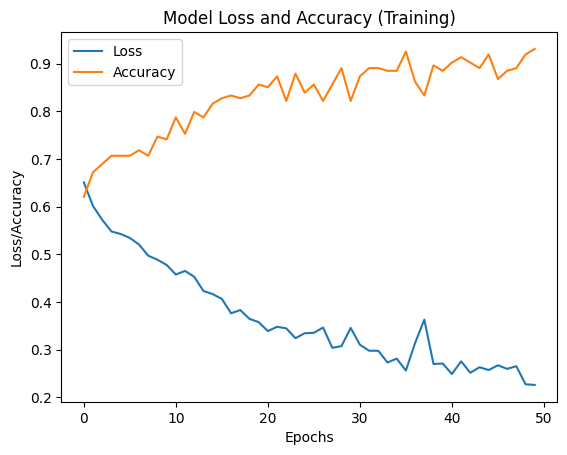

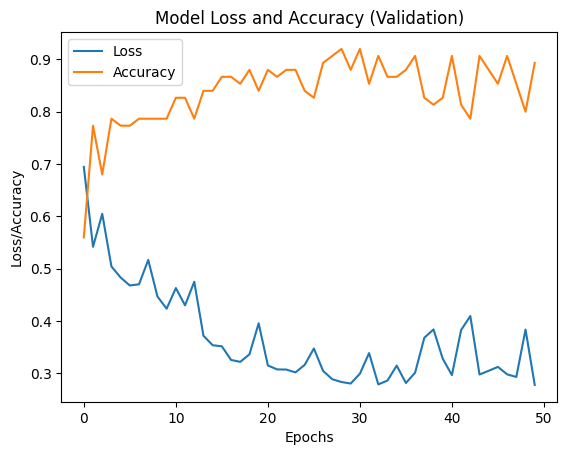

In [37]:
#Plotting the training results
import matplotlib.pyplot as plt
plt.plot(dnn_results.history["loss"])
plt.plot(dnn_results.history["accuracy"])
plt.title("Model Loss and Accuracy (Training)")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(["Loss", "Accuracy"])
plt.show()

#Plotting the testing results
import matplotlib.pyplot as plt
plt.plot(dnn_results.history["val_loss"])
plt.plot(dnn_results.history["val_accuracy"])
plt.title("Model Loss and Accuracy (Validation)")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(["Loss", "Accuracy"])
plt.show()